In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

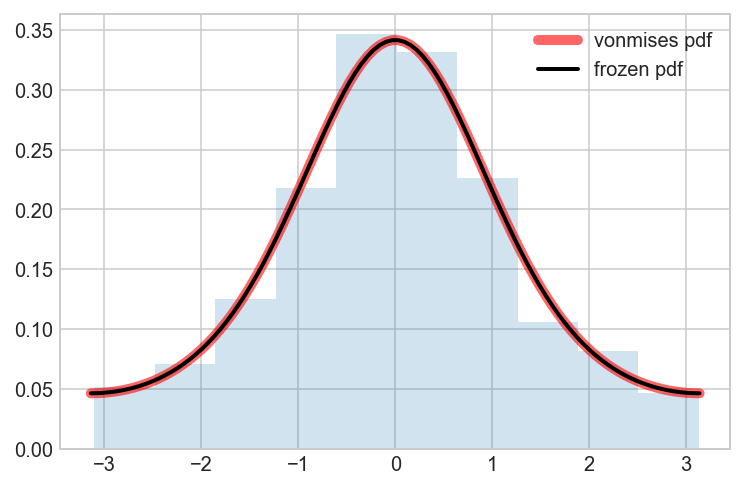

In [3]:
from scipy import stats
from scipy.stats import vonmises, vonmises_line
# https://en.wikipedia.org/wiki/Von_Mises_distribution
# Von MIsses
fig, ax = plt.subplots(1, 1)

kappa = 1

x = np.linspace(vonmises.ppf(0.0001, kappa),
                vonmises.ppf(0.9999, kappa), 100)
ax.plot(x, vonmises.pdf(x, kappa),
       'r-', lw=5, alpha=0.6, label='vonmises pdf')


rv = vonmises(kappa)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = vonmises.rvs(kappa, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

[-3.14159265e+00 -1.57079633e+00  2.22044605e-16  1.57079633e+00
  3.14159265e+00]


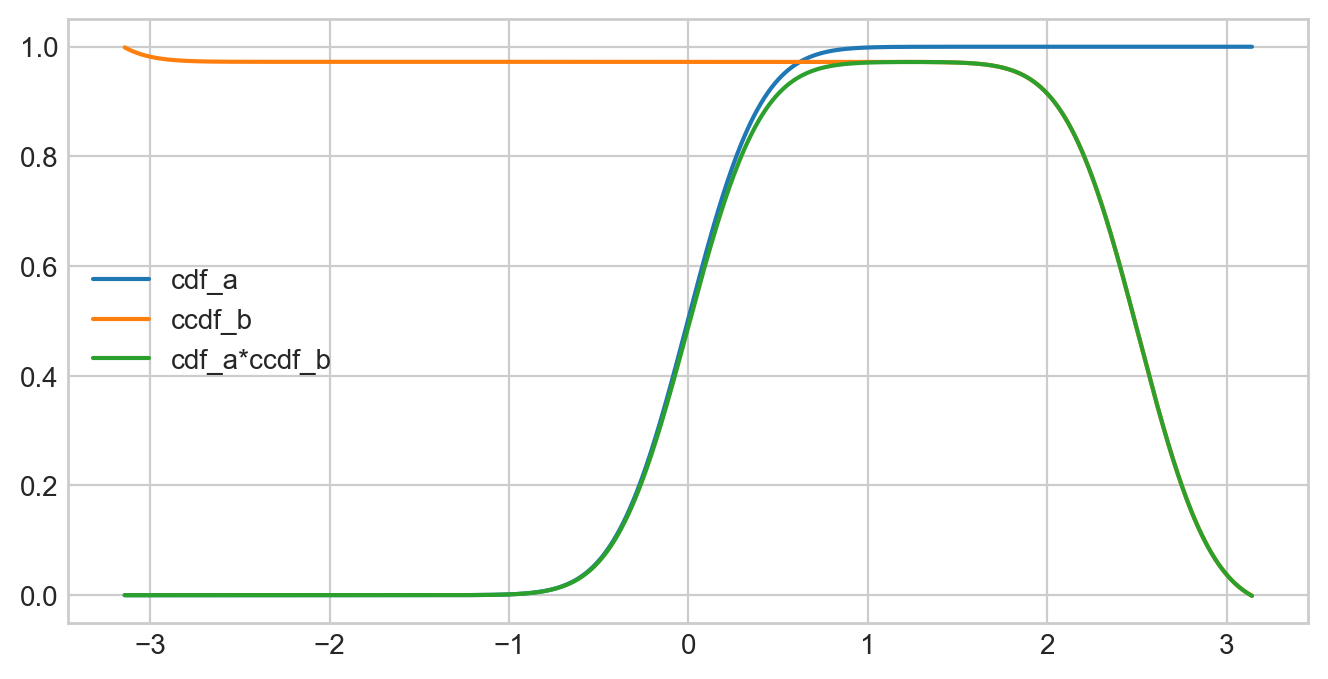

In [4]:
import scipy
import scipy.integrate as integrate

pi = np.pi
# fig, ax = plt.subplots(1, 1)
t = np.linspace(0,1,1000)

t0 = 0

t = -pi +2*pi*((t-t0)) 
print(np.percentile(t, (0,25,50,75,100)))
a = 0

# a = 

b = 0.8*pi

kappa =10
def vonMisesPdf(x,mu,kappa):
    return np.exp(kappa*(np.cos(x-mu)))/(2*pi*scipy.special.i0(kappa))

pdf_a = vonMisesPdf(t,mu=a,kappa=kappa)
cdf_a = np.cumsum(pdf_a)*((t[-1]-t[0])/(len(t)-1))

pdf_b = vonMisesPdf(t,mu=b,kappa=kappa)
cdf_b = np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))
ccdf_b = 1-np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))


fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=100)
ax.plot(t,cdf_a,label="cdf_a")
ax.plot(t,ccdf_b,label="ccdf_b")
ax.plot(t,cdf_a*ccdf_b,label="cdf_a*ccdf_b")
plt.legend()

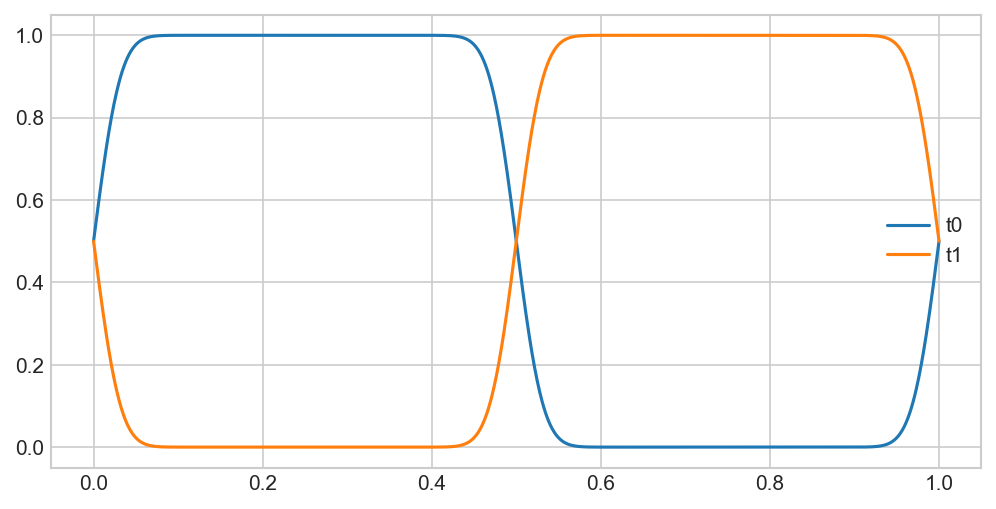

In [27]:
import numpy as np
import scipy
# import rvlib # https://github.com/QuantEcon/rvlib
import numba

def phaseIndicator(t,t0,a,b,sigma):
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
#     ndist_a = rvlib.Normal(mu=a*2.-1.,sigma=sigma)
    ndist_a = scipy.stats.norm(a*2.-1.,sigma)
#     cdf_a = ndist_a.cdf(t_)
    cdf_a = (ndist_a.cdf(t_)-ndist_a.cdf(-1))/(ndist_a.cdf(1)-ndist_a.cdf(-1))
#     ndist_b = rvlib.Normal(mu=b*2.-1.,sigma=sigma)
    ndist_b = scipy.stats.norm(b*2.-1.,sigma)
    ccdf_b = 1- (ndist_b.cdf(t_)-ndist_b.cdf(-1))/(ndist_b.cdf(1)-ndist_b.cdf(-1))
#     ccdf_b = ndist_b.ccdf(t_)
    return cdf_a*ccdf_b


t = np.linspace(0,1,1000)
a = 0.25
b = 0.75
sigma = 0.05
t0 = 0.75
t1 = 0.25

e_i0 = phaseIndicator(t,t0,a,b,sigma)
e_i1 = phaseIndicator(t,t1,a,b,sigma)

fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=75)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

In [7]:
import numpy as np
import numba

@numba.njit(nogil=True,fastmath=True)
def logistic_cdf(x,mu,s):
    return 1/(1+np.exp(-(x-mu)/s))

@numba.njit(nogil=True,fastmath=True)
def phaseIndicator(t,t0,a,b,s):
    """
    phase indicator function with logistic distribution
    ref: https://en.wikipedia.org/wiki/Logistic_distribution
    Input:
        t:  normalized phase [0-1]
        t0: phase offset [0-1]
        a:  mean [0-1]
        b:  mean [0-1]
        s:  variance [0-1]
    returns:
        phase indicator
    """
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
    mu_a = a*2.-1.
    # cumulative distribution function
    cdf_a = (logistic_cdf(t_,mu_a,s)- logistic_cdf(-1,mu_a,s))/(logistic_cdf(1,mu_a,s) - logistic_cdf(-1,mu_a,s))
    mu_b = b*2.-1.
    # complementary cumulative distribution function
    ccdf_b = 1-(logistic_cdf(t_,mu_b,s)- logistic_cdf(-1,mu_b,s))/(logistic_cdf(1,mu_b,s) - logistic_cdf(-1,mu_b,s))
    return cdf_a*ccdf_b

In [ ]:
0.6

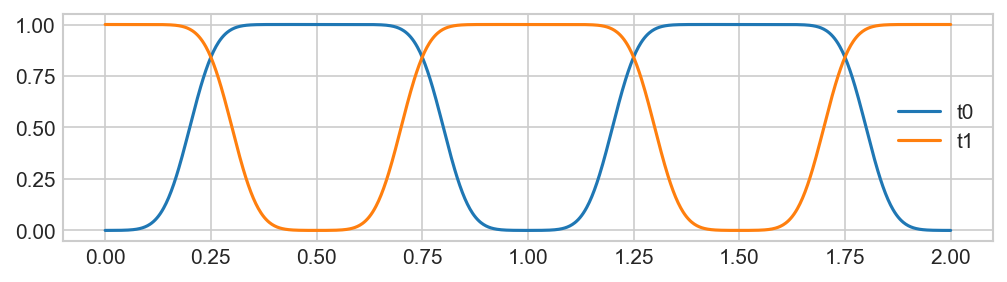

In [46]:
t = np.linspace(0,2,1000)
a = 0.2
b = 0.8
sigma = 0.1
# sigma = 0.01

t0 = 0.
t1 = 0.5

e_i0 = phaseIndicator(t,t0,a,b,sigma)
e_i1 = phaseIndicator(t,t1,a,b,sigma)

fig, ax= plt.subplots(1,1 ,figsize=(8,2),dpi=75)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

In [9]:
%timeit e_i = phaseIndicator(t,t0,a,b,sigma)

21.8 µs ± 443 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
vel_history_size = 10
vel_history = np.empty((vel_history_size,3))

TypeError: empty() missing required argument 'shape' (pos 1)